In [1]:
# import library
import pandas as pd 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import warnings
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


pd.options.mode.chained_assignment = None

# Load data

In [2]:
df = pd.read_csv(r'C:\\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Lấy số hàng và số cột 
df.shape

(7668, 15)

In [4]:
# Thông tin chi tiết
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#Kiểu dữ liệu của từng cột 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Chuyển đổi dữ liệu object->float
df['budget'] = df['budget'].astype(float)
df['gross'] = df['gross'].astype(float)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Tóm tắt thống kê mô tả cho dữ liệu số(numeric)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


# Làm sạch dữ liệu

In [8]:
df['released'] = df['released'].replace(r"\s\([^)]*\)", "", regex=True)

# Convert to datetime format
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y', errors='coerce')

# Check the result
print(df['released'])

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7663   2020-10-23
7664   2020-02-07
7665   2020-04-27
7666   2020-10-01
7667   2020-08-19
Name: released, Length: 7668, dtype: datetime64[ns]


In [9]:
#Xử lý các giá trị Null
# Kiểm tra số lượng giá trị thiếu
print("Số lượng giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())

# Các cột số: thay thế giá trị null bằng trung vị
numeric_columns = ['budget', 'gross', 'votes', 'runtime']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Các cột chuỗi: thay thế giá trị null bằng 'Unknown'
df['company'] = df['company'].fillna('Unknown')
df.head(10)

Số lượng giá trị thiếu trong dữ liệu:
name           0
rating        77
genre          0
year           0
released      59
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,1980-05-09,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,1980-06-20,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,1980-12-19,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,1981-06-19,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,1980-05-16,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [10]:
# Kiểm tra số dòng trùng lặp
duplicate_count = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {duplicate_count}")


Số dòng trùng lặp: 0


In [11]:
#Số hóa dữ liệu
df_numerized = df.copy() 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

print(df_numerized.dtypes)
df_numerized.head()

name                 int16
rating                int8
genre                 int8
year                 int64
released    datetime64[ns]
score              float64
votes              float64
director             int16
writer               int16
star                 int16
country               int8
budget             float64
gross              float64
company              int16
runtime            float64
dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1980-06-13,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2320,146.0
1,5573,6,1,1980,1980-07-02,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1980-06-20,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1980-07-02,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1980-07-25,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


# Phân tích khám phá dữ liệu (EDA) 

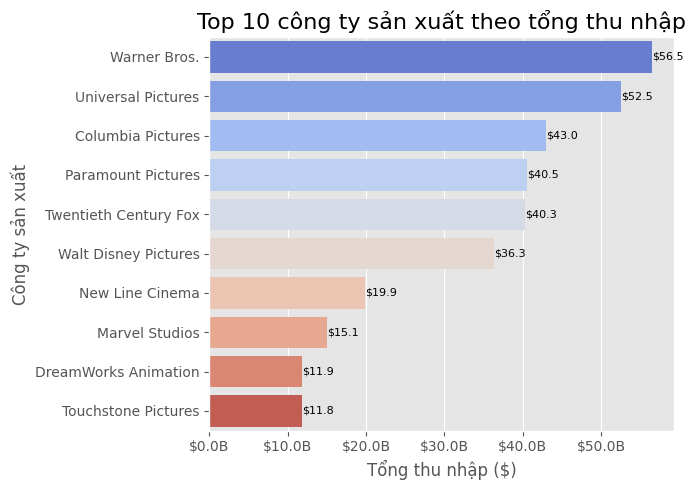

In [12]:
#Top 10 công ty sản xuất theo tổng thu nhập
top_companies = df.groupby('company')['gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7, 5))
ax1 = sns.barplot(x=top_companies.values, y=top_companies.index, palette='coolwarm', hue=top_companies.index) 
plt.title('Top 10 công ty sản xuất theo tổng thu nhập', fontsize=16)
plt.xlabel('Tổng thu nhập ($)', fontsize=12)
plt.ylabel('Công ty sản xuất', fontsize=12)

# Thêm giá trị vào các cột
for i, v in enumerate(top_companies.values):
    ax1.text(v, i, f'${v/1e9:.1f}', va='center', fontsize=8)

ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

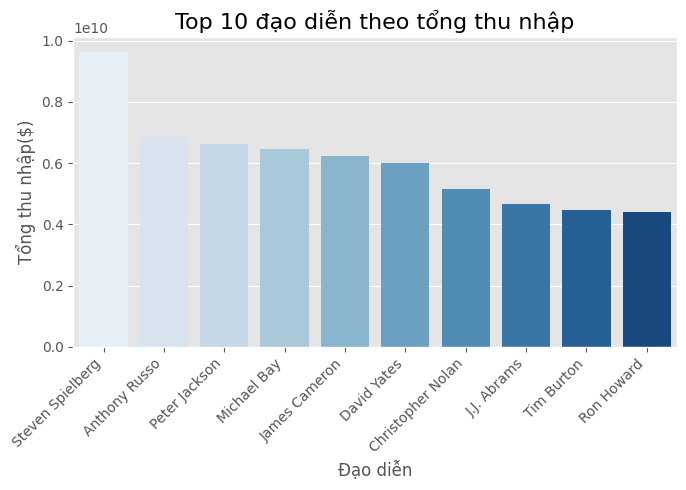

In [13]:
#Top 10 đạo diễn theo tổng thu nhập
top_directors = df.groupby('director')['gross'].sum().nlargest(10)
plt.figure(figsize=(7, 5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Blues', hue=top_directors.index)  
plt.title('Top 10 đạo diễn theo tổng thu nhập', fontsize=16)
plt.xlabel('Đạo diễn', fontsize=12)
plt.ylabel('Tổng thu nhập($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

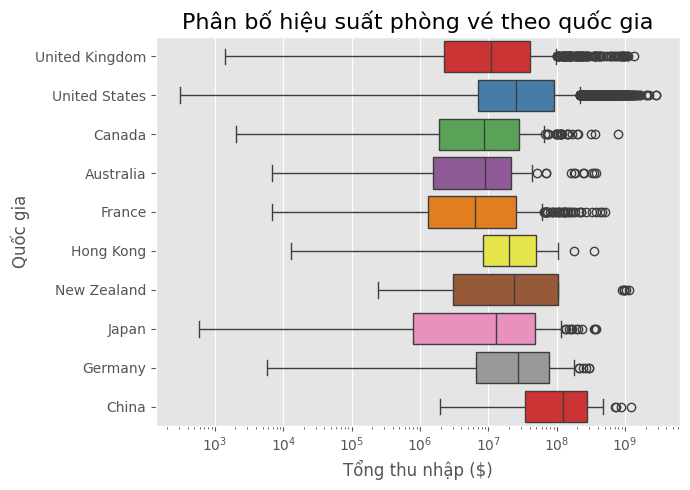

In [14]:
#Phân bố hiệu suất phòng vé theo quốc gia
country_gross = df.groupby('country')['gross'].sum().sort_values(ascending=False)

warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(7, 5))
sns.boxplot(x='gross', y='country', data=df[df['country'].isin(country_gross.index[:10])], palette='Set1')
plt.title('Phân bố hiệu suất phòng vé theo quốc gia', fontsize=16)
plt.xlabel('Tổng thu nhập ($)', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.xscale('log')  
plt.tight_layout()
plt.show()

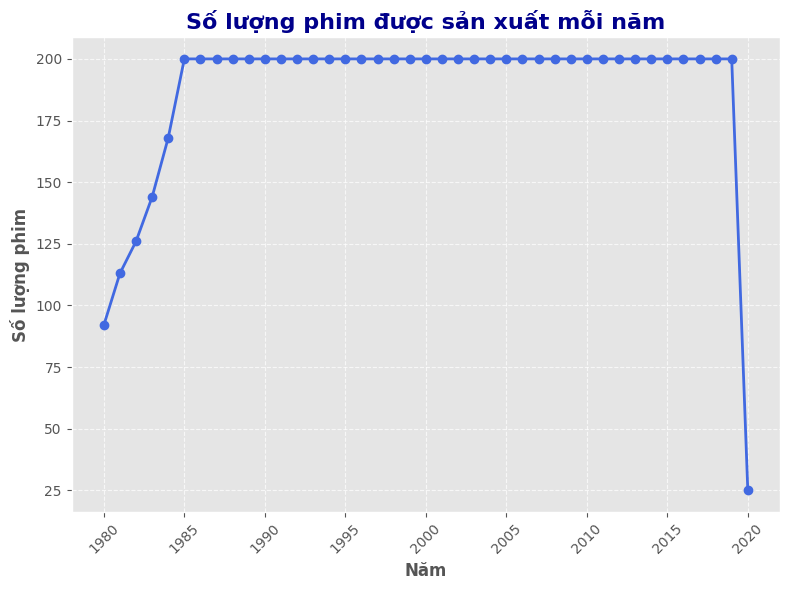

In [15]:
#Số lượng phim được sản xuất mỗi năm
movies_per_year = df.groupby('year')['name'].count()

plt.figure(figsize=(8, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=6)

plt.title("Số lượng phim được sản xuất mỗi năm", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Năm", fontsize=12, fontweight='bold')
plt.ylabel("Số lượng phim", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Trực quan hóa ( Visualization )

In [16]:
#Sắp xếp dữ liệu theo tổng thu nhập
top_grossing= df.sort_values(by=['gross'],inplace=False,ascending=False).head() 
print("Sắp xếp dữ liệu theo tổng thu nhập")
print(top_grossing[['name', 'gross']])

Sắp xếp dữ liệu theo tổng thu nhập
                                            name         gross
5445                                      Avatar  2.847246e+09
7445                           Avengers: Endgame  2.797501e+09
3045                                     Titanic  2.201647e+09
6663  Star Wars: Episode VII - The Force Awakens  2.069522e+09
7244                      Avengers: Infinity War  2.048360e+09


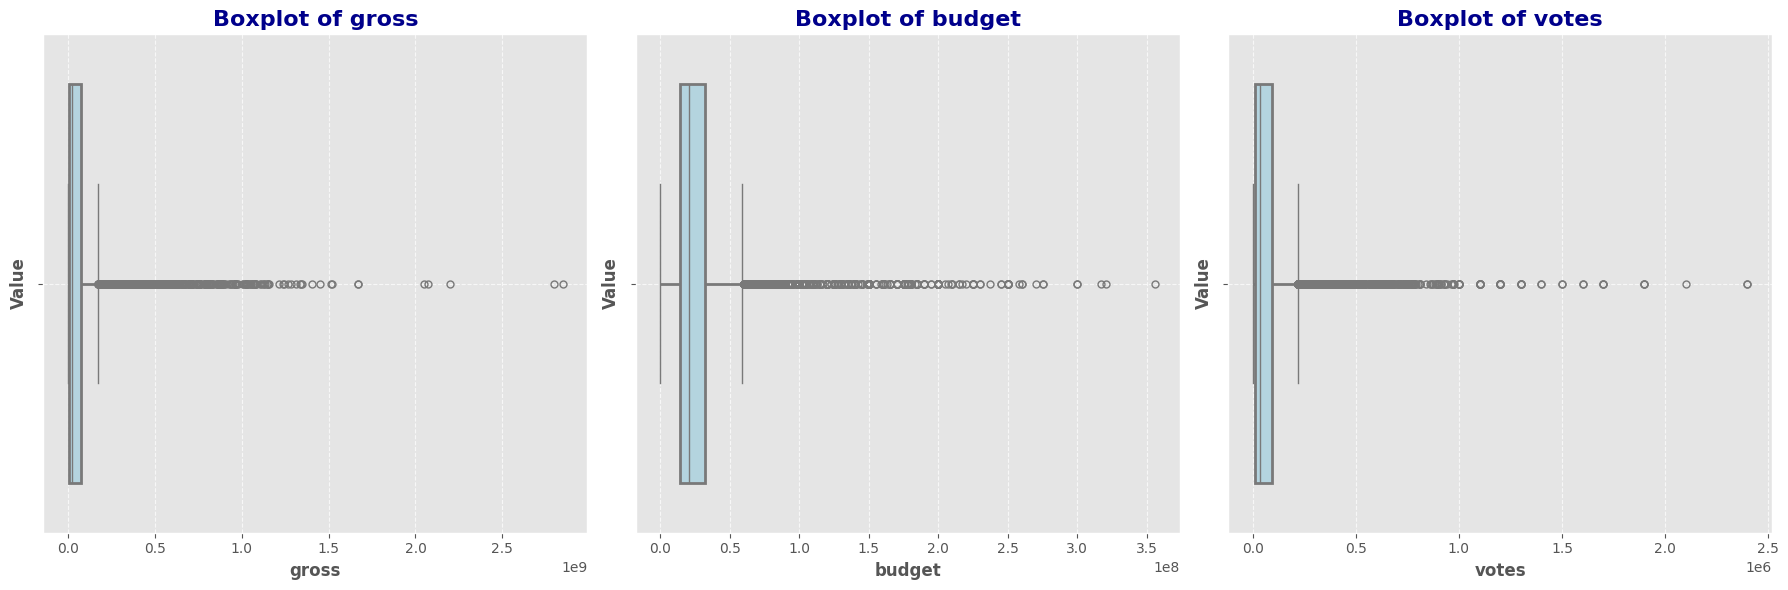

In [17]:
#Phát hiện ngoại lệ
numeric_columns = ['gross', 'budget', 'votes']
#Tạo boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x=df[column], ax=ax, color='lightblue', 
                boxprops=dict(linewidth=2), 
                whiskerprops=dict(linewidth=2), 
                flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(f'Boxplot of {column}', fontsize=16, fontweight='bold', color='darkblue')
    ax.set_xlabel(column, fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    
    ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
# Phân tích ngoại lệ cho các cột ['gross', 'budget', 'votes']
# Duyệt qua các cột trong danh sách numeric_columns
for column in numeric_columns:
    # Tính toán giá trị Q1, Q3, và IQR cho mỗi cột
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Tính các ngưỡng dưới và trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lọc ra các ngoại lệ 
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # In ra các ngoại lệ
    if not outliers.empty:
        print(f"\nOutliers in {column}:")
        print(outliers[column])

    # Kiểm tra nếu có giá trị âm trong cột
    if (df[column] < 0).any():
        print(f"\nNegative values in {column}:")
        print(df[df[column] < 0][column])


Outliers in gross:
2       538375067.0
92      389925971.0
209     792910554.0
221     177200000.0
333     475106177.0
           ...     
7648    426505244.0
7649    319715683.0
7650    245487753.0
7652    461421559.0
7655    240663149.0
Name: gross, Length: 911, dtype: float64

Outliers in budget:
1254     70000000.0
1272     63000000.0
1450     70000000.0
1645     65000000.0
1651     70000000.0
           ...     
7648     90000000.0
7649     85000000.0
7650    175000000.0
7651    135000000.0
7652     80000000.0
Name: budget, Length: 1008, dtype: float64

Outliers in votes:
0        927000.0
2       1200000.0
3        221000.0
7        330000.0
92       905000.0
          ...    
7477     219000.0
7480     222000.0
7481     239000.0
7482     265000.0
7643     387000.0
Name: votes, Length: 803, dtype: float64


# Phân tích tương quan  

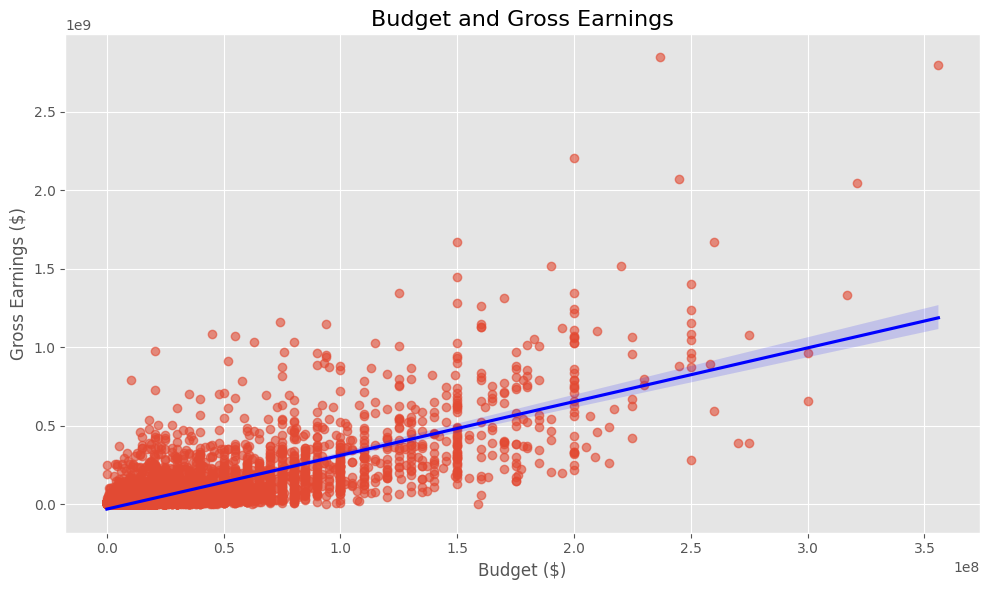

In [27]:
#Budget và Gross Earnings
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'alpha':0.6}, line_kws={'color': 'blue'})
plt.title('Budget and Gross Earnings', fontsize=16)
plt.xlabel('Budget ($)')
plt.ylabel('Gross Earnings ($)')
plt.tight_layout()
plt.show()

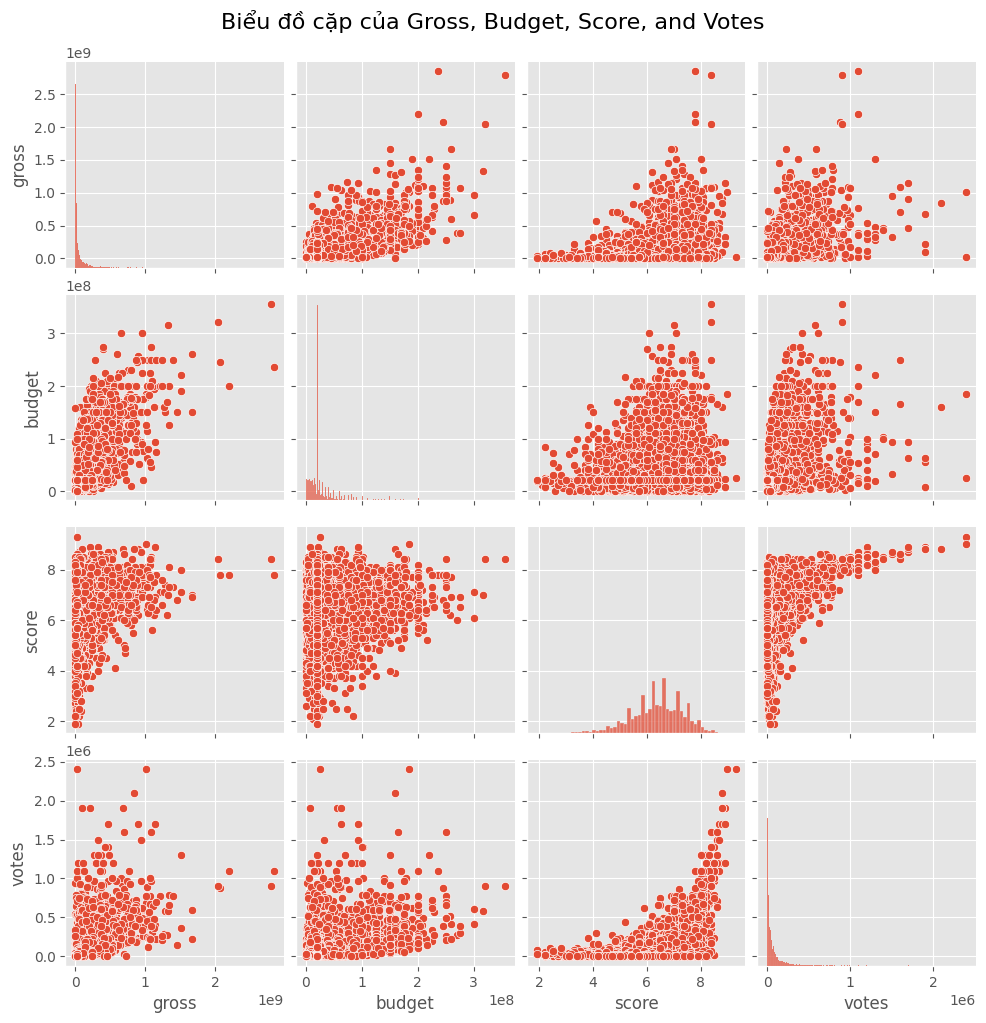

In [28]:
#Biểu đồ cặp của Gross, Budget, Score, and Votes
sns.pairplot(df[['gross', 'budget', 'score', 'votes']])
plt.suptitle('Biểu đồ cặp của Gross, Budget, Score, and Votes', fontsize=16, y=1.02)
plt.show()

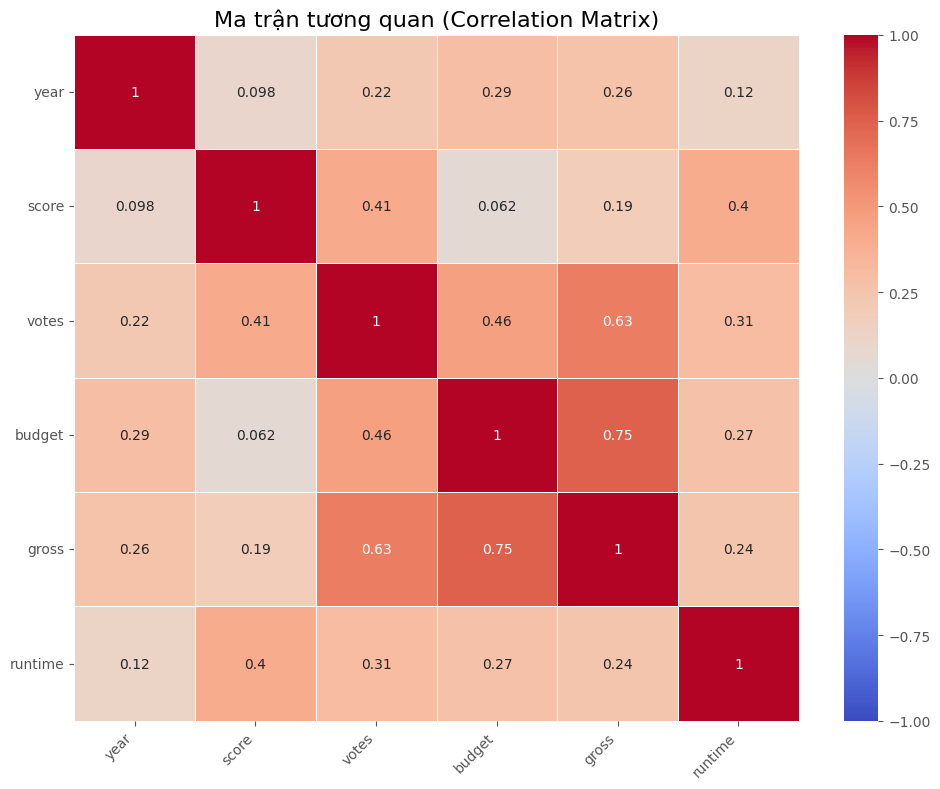

In [29]:
#Ma trận tương quan
features = df.select_dtypes(include=[np.number]).columns.tolist()  # chỉ lấy cột số
correlation_matrix_numeric = df[features].corr(method='pearson')   # ma trận tương quan

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Ma trận tương quan (Correlation Matrix)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

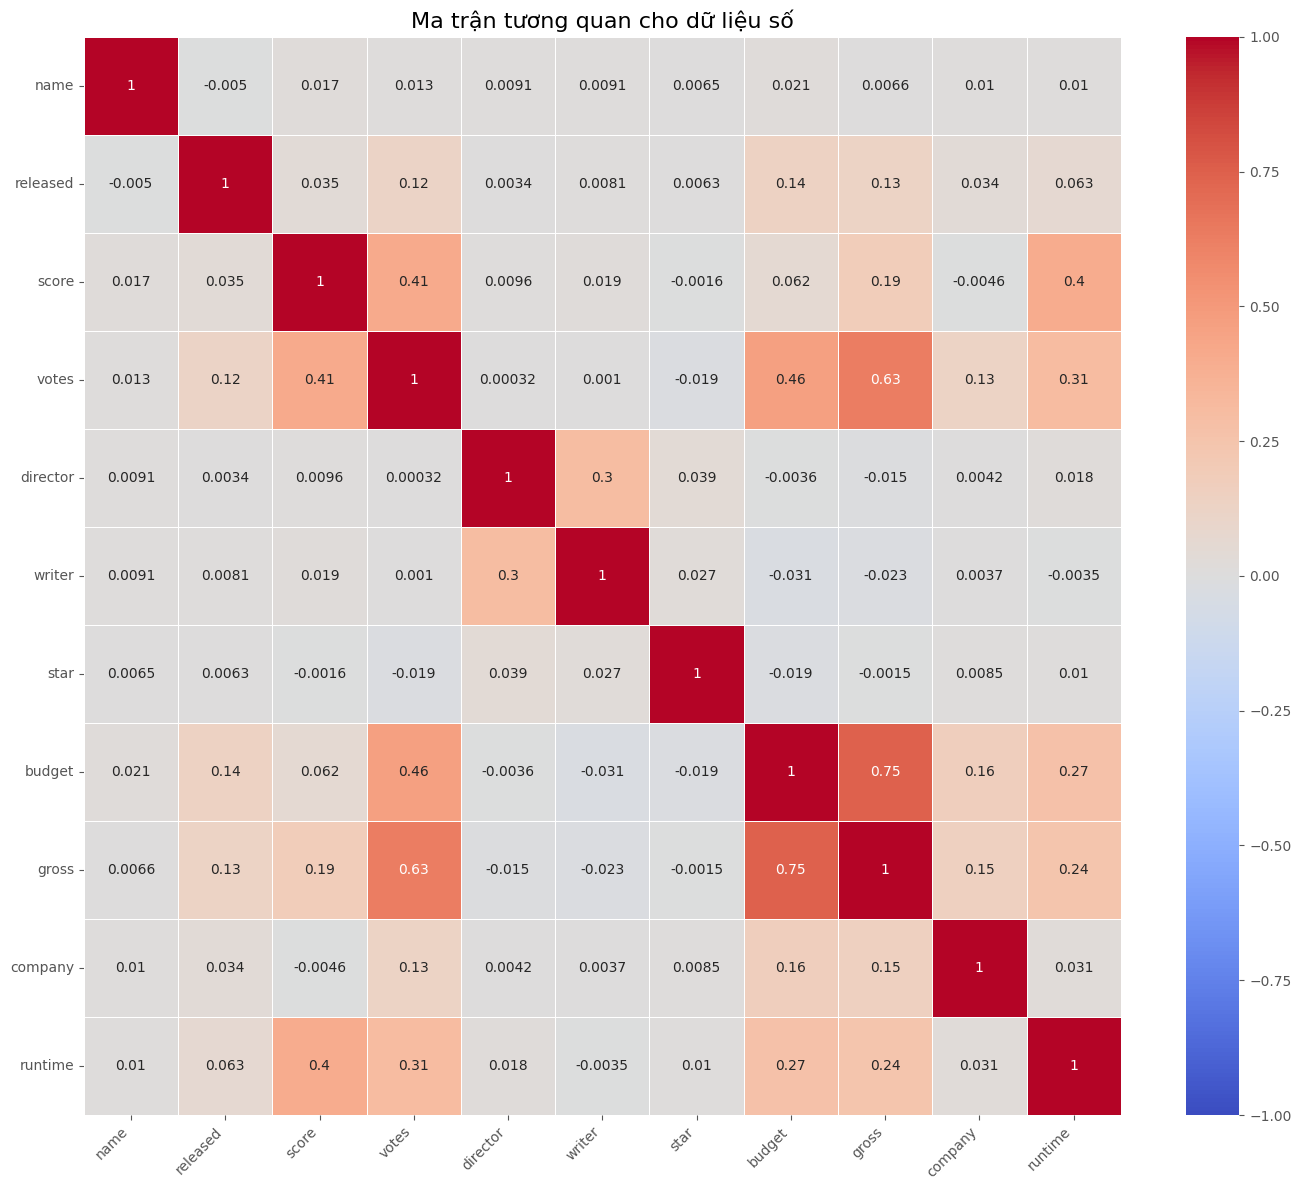

In [36]:
selected_features = ['name', 'released', 'score', 
                     'votes', 'director', 'writer', 'star', 
                     'budget', 'gross', 'company', 'runtime']

# Tạo bản sao của dataframe để xử lý riêng
df_encoded = df[selected_features].copy()

# Mã hóa tất cả các cột không phải số
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Tính ma trận tương quan
correlation_matrix = df_encoded.corr(method='pearson')

# Vẽ biểu đồ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Thêm tiêu đề và điều chỉnh
plt.title('Ma trận tương quan cho dữ liệu số', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
print("Các cặp tương quan cao:")
print(high_corr)

Các cặp tương quan cao:
votes   gross     0.632120
gross   votes     0.632120
budget  gross     0.745881
gross   budget    0.745881
dtype: float64
